<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/reviews/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dados dos hoteis

In [2]:
date = "2023/02/15"

## Cria o DataFrame

In [172]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/tcc/data/2023/02/15/aram-beach-&-convention-gm-reviews.csv")
df['source'] = 'aram-beach-&-convention-gm-reviews.csv'
df[:1]

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob1lud2ZBEAE,2023-02-15 02:48:02.460131,5.0,5.0,5 horas atrás,-1,"Destaques do hotel Luxuoso, Vista linda e Tran...",Negócios | Amigos,Lucas Victor da Luz Cesar,True,21,12.0,https://www.google.com/maps/contrib/1109357607...,NaN,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv


In [ ]:
import pandas as pd
import glob
import os

path_to_lookup = f'/content/gdrive/MyDrive/tcc/data/{date}/'
file_pattern = "*.csv"

# setting the path for joining multiple files
files = os.path.join(path_to_lookup, file_pattern)

# list of merged files returned
files = glob.glob(files)

df = pd.concat(map(lambda file: pd.read_csv(file).assign(source=file.split("/")[-1]), files), ignore_index=True)

332721

In [173]:
initial_count = df.shape[0]
df = df.loc[df['text'].notna()] ## and len(df['text']) > 2 deveria filtrar por tamanho minimo de texto?
filtered_count = df.shape[0]
filtered_count

1652

In [174]:
initial_count ## reviews no total com e sem texto

2679

In [175]:
initial_count - filtered_count ## reviews sem texto

1027

In [176]:
filtered_count ## reviews com texto

1652

In [5]:
df[['source', 'rating']].groupby(['source']).size().reset_index(name='counts').sort_values("counts", ascending=False)

,source,counts
0,aram-beach-&-convention-gm-reviews.csv,1652


In [6]:
df.describe()

,rating,rating_max,likes,user_photos
count,1652.000000,1652.0,1652.000000,1011.000000
mean,3.663438,5.0,0.226392,71.205350
std,1.384099,0.0,0.658233,144.144405
min,1.000000,5.0,0.000000,1.000000
25%,3.000000,5.0,0.000000,3.051000
50%,4.000000,5.0,0.000000,15.000000
75%,5.000000,5.0,0.000000,64.500000
max,5.000000,5.0,6.000000,993.000000


In [7]:
import seaborn as sns
sns.__version__


'0.12.2'

<Axes: xlabel='rating', ylabel='count'>

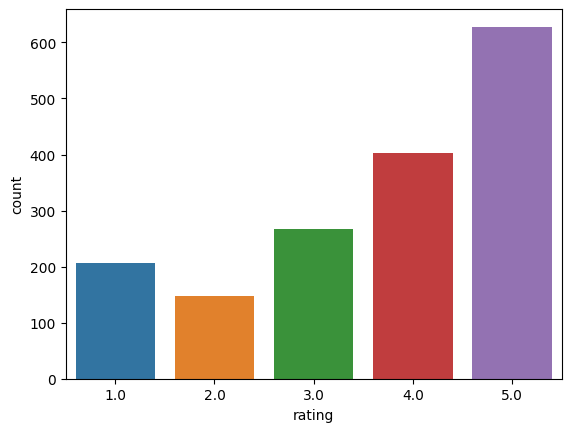

In [8]:
sns.countplot(x="rating", data=df)

<Axes: xlabel='user_reviews', ylabel='count'>

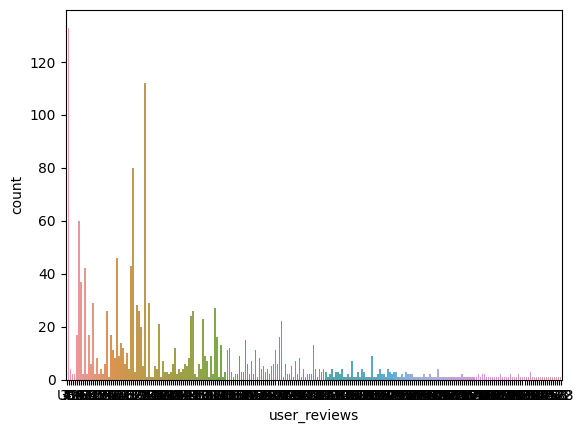

In [9]:
sns.countplot(x="user_reviews", data=df)

In [10]:
df[:1]

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source
1,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNod2FMV2t3RRAB,2023-02-15 02:48:02.476867,1.0,5.0,10 horas atrás,0,NaN,NaN,iranilson barbosa,False,7,1.0,https://www.google.com/maps/contrib/1143470110...,Fui com meu filho nas minhas férias e não reco...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv


In [22]:
from datetime import datetime, timedelta
import re

def obtem_data(row):
  
  # String de data relativa
  data_relativa_str = row.relative_date
  timestamp = row.retrieval_date
  
  # Converte a string em um objeto timedelta
  unidade_tempo = data_relativa_str.split()[1]
  quantidade_tempo = 1 if 'um' in data_relativa_str.split()[0] else int(data_relativa_str.split()[0])

  if 'segundo' in unidade_tempo:
      data_relativa = timedelta(seconds=quantidade_tempo)
  elif 'minuto' in unidade_tempo:
      data_relativa = timedelta(minutes=quantidade_tempo)
  elif 'hora' in unidade_tempo:
      data_relativa = timedelta(hours=quantidade_tempo)
  elif 'dia' in unidade_tempo:
      data_relativa = timedelta(days=quantidade_tempo)
  elif 'semana' in unidade_tempo:
      data_relativa = timedelta(weeks=quantidade_tempo)
  elif re.match(r"m(ê|e)s", unidade_tempo):
      data_relativa = timedelta(days=30*quantidade_tempo)
  elif 'ano' in unidade_tempo:
      data_relativa = timedelta(days=365*quantidade_tempo)
  else:
      return timestamp

  # Timestamp
  try:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
  except:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
  
  return (dt_timestamp - data_relativa).date()

  

teste = df.copy()
teste['text'] = teste['text'].fillna('')
teste['data_avaliacao'] = teste.apply(obtem_data, axis=1)
teste['ano_avaliacao'] = teste['data_avaliacao'].apply(lambda x: x.year)
teste

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,...,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source,data_avaliacao,ano_avaliacao
1,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNod2FMV2t3RRAB,2023-02-15 02:48:02.476867,1.0,5.0,10 horas atrás,0,NaN,NaN,iranilson barbosa,...,7,1.000,https://www.google.com/maps/contrib/1143470110...,Fui com meu filho nas minhas férias e não reco...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-14,2023
3,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoanBLT1ZBEAE,2023-02-15 02:48:02.487116,5.0,5.0,2 dias atrás,0,Quartos : 5/5 | Serviço : 5/5 | Local : 5/5 De...,Férias | Casal,ricardo pereira,...,Um,1.000,https://www.google.com/maps/contrib/1057614675...,Excelente o atendimento foi maravilhoso todos ...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-13,2023
4,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob3YzY1JREAE,2023-02-15 02:48:02.494936,4.0,5.0,6 dias atrás,0,NaN,NaN,geraldo goncalves,...,49,16.000,https://www.google.com/maps/contrib/1049039187...,"Acabei de chegar,por enquanto não posso falar ...",NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-09,2023
5,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNob3ZHdHB3RRAB,2023-02-15 02:48:02.500336,4.0,5.0,6 dias atrás,0,Quartos : 4/5 | Serviço : 4/5 | Local : 4/5 De...,Férias | Casal,Paulo Lampert,...,309,1.144,https://www.google.com/maps/contrib/1098707594...,Viagem de casal com um pernoite no sábado. Hot...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-09,2023
6,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUQtaXJLdlZBEAE,2023-02-15 02:48:02.505463,5.0,5.0,uma semana atrás,4,Quartos : 5/5 | Serviço : 5/5 | Local : 5/5 De...,Férias | Família,Rafael Abreu - Artes Visuais,...,80,2.005,https://www.google.com/maps/contrib/1151921703...,Quero poder deixar aqui as minhas impressões s...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2023-02-08,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,NaN,ChZDSUhNMG9nS0VJQ0FnSURZbFoyQklREAE,2023-02-15 02:52:01.480894,2.0,5.0,10 anos atrás,0,NaN,NaN,Jose carlos feitosa,...,Um,NaN,https://www.google.com/maps/contrib/1059240325...,"O hotel deveria ser melhor cuidado, funcionari...",NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17,2013
2673,NaN,ChZDSUhNMG9nS0VJQ0FnSURZOGEtT0dBEAE,2023-02-15 02:52:01.485524,3.0,5.0,10 anos atrás,0,NaN,NaN,Paulo Mendes,...,39,3.000,https://www.google.com/maps/contrib/1148547574...,Hotel necessita mais manutenção,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17,2013
2675,NaN,ChdDSUhNMG9nS0VJQ0FnSURZbWRMVGx3RRAB,2023-02-15 02:52:01.497862,4.0,5.0,10 anos atrás,0,NaN,NaN,Ane Gracielle Albuquerque,...,9,9.000,https://www.google.com/maps/contrib/1052859806...,Estou hospedada no hotel -ago/2012- e achei os...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17,2013
2676,NaN,ChZDSUhNMG9nS0VJQ0FnSURZbGQteWNREAE,2023-02-15 02:52:01.503724,3.0,5.0,10 anos atrás,0,NaN,NaN,Evandro Ferraz,...,10,NaN,https://www.google.com/maps/contrib/1029729585...,Hotel quatro estrelas com muita boa vontade. O...,NaN,NaN,[],aram-beach-&-convention-gm-reviews.csv,2013-02-17,2013


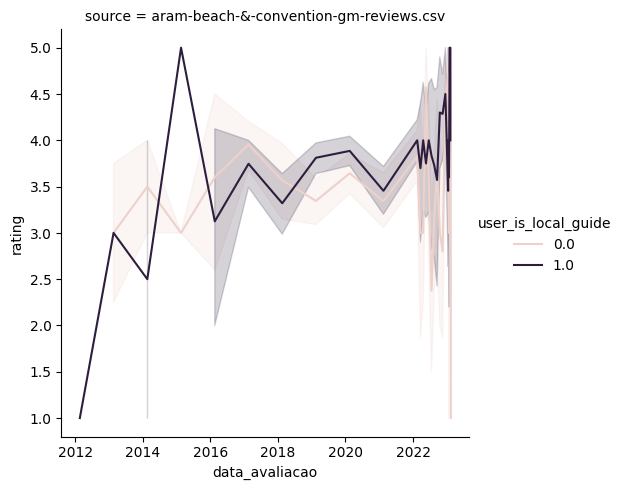

In [13]:
import seaborn as sns

sns.relplot(x='data_avaliacao', y='rating', col='source', hue='user_is_local_guide',
    kind="line", data=teste)

In [23]:
aux = teste.copy()[['rating', 'text', 'data_avaliacao', 'user_is_local_guide', 'user_reviews']]
aux.head()

,rating,text,data_avaliacao,user_is_local_guide,user_reviews
1,1.0,Fui com meu filho nas minhas férias e não reco...,2023-02-14,False,7
3,5.0,Excelente o atendimento foi maravilhoso todos ...,2023-02-13,False,Um
4,4.0,"Acabei de chegar,por enquanto não posso falar ...",2023-02-09,True,49
5,4.0,Viagem de casal com um pernoite no sábado. Hot...,2023-02-09,True,309
6,5.0,Quero poder deixar aqui as minhas impressões s...,2023-02-08,True,80


In [15]:
aux['data_avaliacao'] = aux['data_avaliacao'].apply(lambda x: x.year)

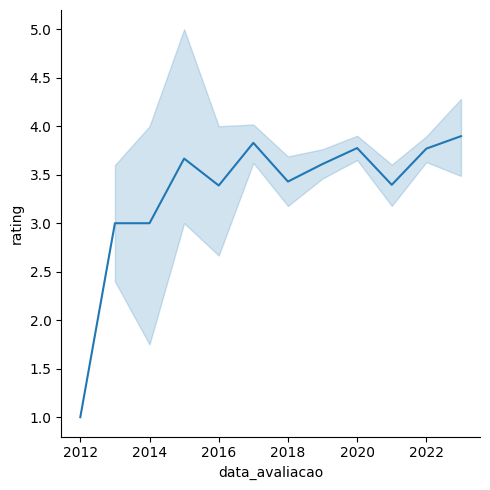

In [16]:
sns.relplot(x='data_avaliacao', y='rating', kind="line", data=aux)

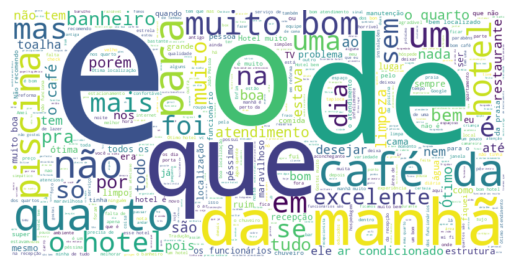

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todos os textos em uma única string
texto = ' '.join(aux['text'].tolist())

# Criar um objeto WordCloud com as configurações desejadas
wc = WordCloud(background_color='white', max_words=1000, width=800, height=400)

# Gerar a nuvem de palavras
nuvem = wc.generate(texto)

# Exibir a nuvem de palavras
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()

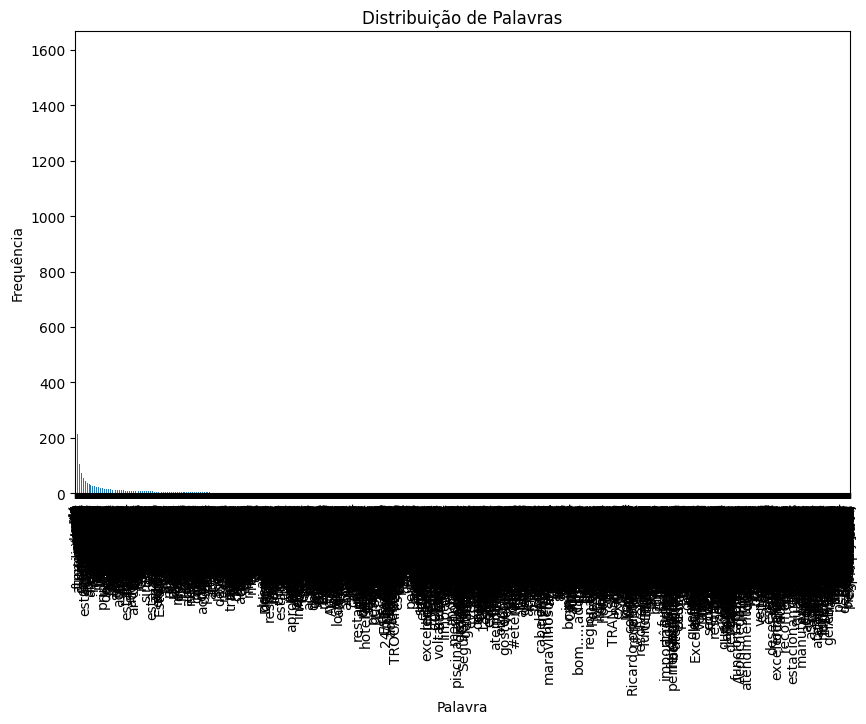

In [18]:
# Dividir a string em palavras
palavras = texto.split()

# Contar as ocorrências de cada palavra
contagem = pd.Series(palavras).value_counts()

# Criar um gráfico de barras para visualizar a distribuição de palavras
contagem.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Distribuição de Palavras')
plt.show()

In [19]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=73c466bd80daf91430b81dc0b0df7ab896bcf3ac82ced656fe2fd5e41f9bab32
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [135]:
from langdetect import detect_langs
# Função para detectar idioma, tratando valores nulos e textos vazios
def detectar_idioma(texto):
    if texto and len(texto) > 2:  # Verificar se o texto não é nulo e não está vazio
        return detect_langs(texto)
    else:
        return None

# Aplica a função ao DataFrame e adiciona uma coluna com o resultado
aux['idioma'] = aux['text'].apply(detectar_idioma)
aux['idioma'] = aux['idioma'].dropna()

aux

,rating,text,data_avaliacao,user_is_local_guide,user_reviews,idioma
1,1.0,Fui com meu filho nas minhas férias e não reco...,2023-02-14,False,7,[pt:0.9999970231209299]
3,5.0,Excelente o atendimento foi maravilhoso todos ...,2023-02-13,False,Um,[pt:0.9999977026338926]
4,4.0,"Acabei de chegar,por enquanto não posso falar ...",2023-02-09,True,49,[pt:0.9999959001810452]
5,4.0,Viagem de casal com um pernoite no sábado. Hot...,2023-02-09,True,309,[pt:0.9999965631641681]
6,5.0,Quero poder deixar aqui as minhas impressões s...,2023-02-08,True,80,[pt:0.9999954138897489]
...,...,...,...,...,...,...
2672,2.0,"O hotel deveria ser melhor cuidado, funcionari...",2013-02-17,False,Um,[pt:0.9999962820821092]
2673,3.0,Hotel necessita mais manutenção,2013-02-17,True,39,[pt:0.9999973135625456]
2675,4.0,Estou hospedada no hotel -ago/2012- e achei os...,2013-02-17,False,9,[pt:0.9999977476035531]
2676,3.0,Hotel quatro estrelas com muita boa vontade. O...,2013-02-17,False,10,[pt:0.999998137027878]


In [138]:
aux['idioma'] = aux['idioma'].dropna().apply(lambda x: list(map(lambda y: y.lang,x)))

In [144]:
df = aux[aux['idioma'].apply(lambda x: not isinstance(x, list))]

df

,rating,text,data_avaliacao,user_is_local_guide,user_reviews,idioma
2446,3.0,+-,2018-02-16,True,89,NaN


In [145]:
df = aux[aux['idioma'].apply(lambda x: isinstance(x, list))]

In [148]:
df= df[df['idioma'].apply(lambda x: 'pt' not in x)]

df

,rating,text,data_avaliacao,user_is_local_guide,user_reviews,idioma
39,4.0,Excelente,2023-01-16,True,46,[ro]
48,5.0,Ótimo,2023-01-16,True,20,[lt]
138,5.0,Ótimo,2022-10-18,False,3,[lt]
142,5.0,Super indico.,2022-10-18,True,119,[it]
150,5.0,Excelente estrutura,2022-10-18,True,91,[ro]
...,...,...,...,...,...,...
2616,4.0,Excelente,2017-02-16,True,207,[ro]
2619,4.0,Bonito,2017-02-16,True,182,[it]
2621,4.0,Satisfeito.,2017-02-16,True,127,[it]
2631,3.0,fica a desejar,2016-02-17,True,202,[ca]


In [155]:
teste['text'].apply(detectar_idioma)[2663]

[de:0.9999956150530794]

In [158]:
detect_langs('Satisfeito.')

[it:0.9999941179600034]

In [160]:
teste.count()

token                     1646
review_id                 1652
retrieval_date            1652
rating                    1652
rating_max                1652
relative_date             1652
likes                     1652
other_ratings              301
trip_type_travel_group     254
user_name                 1652
user_is_local_guide       1651
user_reviews              1651
user_photos               1011
user_url                  1651
text                      1652
response_text              350
response_relative_date     350
errors                    1652
source                    1652
data_avaliacao            1652
ano_avaliacao             1652
dtype: int64